# Convolution of Triangular Windows

This notebook performs the convolution of two triangular windows without using `np.convolve`.

## Steps:
1. Define the convolution function.
2. Generate two triangular windows.
3. Perform the convolution.
4. Plot and interpret the results.

## Convolution Equation:

$$
y[n] = \sum_{k=0}^{N_a-1} a[k] \cdot b[n-k]
$$

## Triangular Window Equation:

$$
w[n] = 1 - \frac{|n - (N - 1)/2|}{(N - 1)/2}, \quad \text{for } n = 0, 1, 2, ..., N - 1
$$


In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Convolution Function
We manually implement the convolution operation as follows:
1. Compute the output signal length:  
   $$
   L_y = N_a + N_b - 1
   $$
2. Iterate over the indices and sum the element-wise multiplications.


In [12]:
def convolution(a, b):
    L_a = len(a)
    L_b = len(b)
    L_y = L_a + L_b - 1  # Length of the output signal
    y = [0] * L_y  # Initialize output signal

    # Compute convolution step by step
    for n in range(L_y):
        for k in range(L_a):
            if 0 <= n - k < L_b:
                y[n] += a[k] * b[n - k]
    
    return y


## Triangular Windows
We generate two identical triangular windows using the following formula:

$$
w[n] = 1 - \frac{|n - (N - 1)/2|}{(N - 1)/2}
$$


In [13]:
N = 101  # Length of the triangular windows

# Generate two identical triangular windows
a = np.array([1 - abs((i - (N - 1) / 2) / ((N - 1) / 2)) for i in range(N)])
b = np.array([1 - abs((i - (N - 1) / 2) / ((N - 1) / 2)) for i in range(N)])

## Perform Convolution
We now apply the convolution function to the generated windows.


In [14]:
y = convolution(a, b)

## Plot the Results
We visualize:
1. The first triangular window.
2. The second triangular window.
3. The result of their convolution.

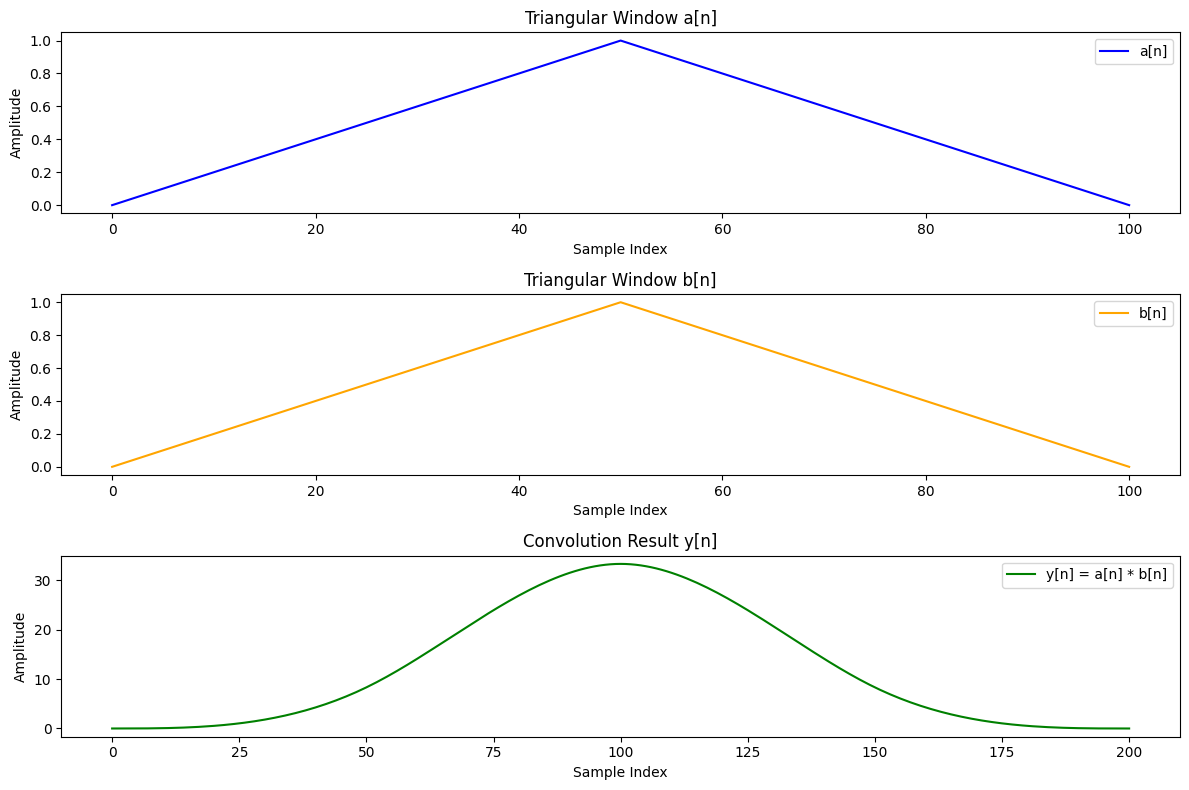

In [15]:
plt.figure(figsize=(12, 8))

# Plot the first triangular window
plt.subplot(3, 1, 1)
plt.plot(a, label='a[n]', color='blue')
plt.title('Triangular Window a[n]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# Plot the second triangular window
plt.subplot(3, 1, 2)
plt.plot(b, label='b[n]', color='orange')
plt.title('Triangular Window b[n]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

# Plot the result of the convolution
plt.subplot(3, 1, 3)
plt.plot(y, label='y[n] = a[n] * b[n]', color='green')
plt.title('Convolution Result y[n]')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


## Interpretation of Results

1. The first and second plots show the two identical triangular windows.
2. The convolution result (third plot) resembles a **smoother, wider** triangular shape.
3. This happens because convolving two signals is equivalent to **blurring** or **smoothing** their shape.
4. The length of the output signal is:

$$
L_y = N_a + N_b - 1 = 101 + 101 - 1 = 201
$$
Thus, the convolution extends the signal's length and smooths its shape.